# 0. Preprocess Data

This step load all land use data in WA. As this study only focus on King County, others county are filtered out.

In [2]:
import geopandas as gpd

In [130]:
filename = "./Data/General_Land_Use_Final_Dataset.geojson"
file = open(filename)
gdf = gpd.read_file(file)

In [131]:
gdf.head()

OBJECTID         MASTER_CAT                    SUB_CAT URB CITY_NM  \
0         1       Undesignated               Undesignated               
1         2       Undesignated               Undesignated               
2         3  Agricultural Area  Primary Agricultural Area               
3         4             Tribal     Tribal Inholding Lands               
4         5       Forest Lands        Primary Forest Area               

  AUPolyID   NAME  LUCodeID JoinID  FID  ... PCTNEW_16_ PCT_NEW_17  \
0           Mason         2   None    0  ...   0.000000   0.000000   
1           Mason         3   None    1  ...   0.000000   0.000000   
2           Mason         4   None    2  ...   0.000000   0.000000   
3           Mason         5   None    3  ...   0.013196   0.002903   
4           Mason         6   None    4  ...   0.016393   0.010870   

  HU_2017_Density         Acres  NEW_HU_17_Density NEW_00_17_Density  \
0        0.000000      0.000002           0.000000          0.000000   
1        0.000000    191.430601           0.000000          0.000000   
2        0.012989    615.896643           0.000000          0.001624   
3        0.109809   6292.763714           0.000318          0.027969   
4        0.001892  98297.534174           0.000020          0.000346   

    Shape__Area  Shape__Length                              GlobalID  \
0  6.597900e-02   3.128234e+01  4c56ccb7-57d3-4722-8b6b-44a97d4baee0   
1  8.338683e+06   2.966529e+05  c37833a6-27ca-442c-a43f-fa7e99066352   
2  2.682835e+07   1.269735e+05  fee71d64-d671-448b-ba30-c6953a036b49   
3  2.741115e+08   9.800588e+05  db8f9366-7822-44e4-8d4a-f1a60341a2d6   
4  4.281824e+09   2.550548e+06  16b46e92-682c-4a56-a6dd-2930ea9b5e1c   

                                            geometry  
0                                               None  
1  MULTIPOLYGON (((-123.21720 47.08491, -123.2153...  
2  MULTIPOLYGON (((-123.08142 47.09216, -123.0814...  
3  POLYGON ((-123.42936 47.31595, -123.43451 47.3...  
4  POLYGON ((-123.12341 47.43258, -123.12314 47.4...  

[5 rows x 75 columns]

In [132]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [133]:
gdf.columns

Index(['OBJECTID', 'MASTER_CAT', 'SUB_CAT', 'URB', 'CITY_NM', 'AUPolyID',
       'NAME', 'LUCodeID', 'JoinID', 'FID', 'URB_1', 'CITY_NM_1', 'AUPolyID_1',
       'NAME_1', 'LUCodeID_1', 'SubCID', 'HU_2000', 'HU_2001', 'HU_2002',
       'HU_2003', 'HU_2004', 'HU_2005', 'HU_2006', 'HU_2007', 'HU_2008',
       'HU_2009', 'HU_2010', 'HU_2011', 'HU_2012', 'HU_2013', 'HU_2014',
       'HU_2015', 'HU_2016', 'HU_2017', 'NEW_HU_00_', 'PCT_NEW_00',
       'NEW_HU_10_', 'PCT_NEW_01', 'NEW_HU_01', 'NEW_HU_02', 'NEW_HU_03',
       'NEW_HU_04', 'NEW_HU_05', 'NEW_HU_06', 'NEW_HU_07', 'NEW_HU_08',
       'NEW_HU_09', 'NEW_HU_10', 'NEW_HU_11', 'NEW_HU_12', 'NEW_HU_13',
       'NEW_HU_14', 'NEW_HU_15', 'NEW_HU_16', 'NEW_HU_17', 'NEW_00_17',
       'PCT_NEW_02', 'NEW_00_05', 'NEW_06_10', 'NEW_11_15', 'NEW_16_17',
       'NEW_17', 'PCTNEW_00_', 'PCT_NEW_06', 'PCTNEW_11_', 'PCTNEW_16_',
       'PCT_NEW_17', 'HU_2017_Density', 'Acres', 'NEW_HU_17_Density',
       'NEW_00_17_Density', 'Shape__Area', 'Shape__L

In [137]:
king = ['Algona','Auburn','Beaux Arts Village','Bellevue','Black Diamond','Bothell','Burien','Carnation','Clyde Hill',
        'Covington','Des Moines','Duvall','Enumclaw','Federal Way','Hunts Point','Issaquah','Kenmore','Kent','Kirkland',
        'Lake Forest Park','Maple Valley','Medina','Mercer Island','Milton','Newcastle','Normandy Park','North Bend',
        'Pacific','Redmond','Renton','Sammamish','SeaTac','Seattle','Shoreline','Skykomish','Snoqualmie','Tukwila',
        'Woodinville','Yarrow Point']

In [138]:
kin_gdf = gdf[gdf['CITY_NM'].isin(king)]

In [140]:
#kin_gdf.to_file('./Data/king_gdf.geojson', driver="GeoJSON")  

## 1. Load filtered data

This step visualizes type of land us in King Couty and inspect all types of land use.

In [25]:
filename = "./Data/king_gdf.geojson"
file = open(filename)
king_gdf = gpd.read_file(file)

C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

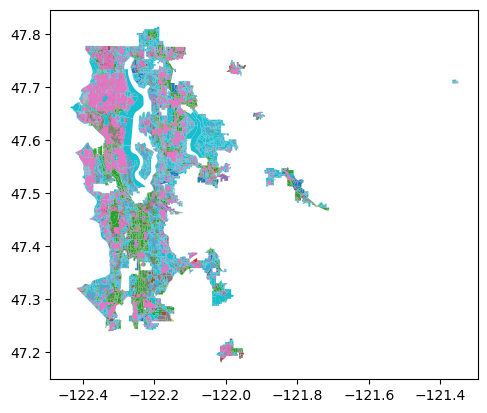

In [26]:
king_gdf.plot(column='MASTER_CAT')

In [27]:
king_gdf['MASTER_CAT'].value_counts()

MASTER_CAT
Intensive Urban                          1877
Urban Character Residential              1429
ROW                                       753
PROW                                      717
Undesignated                              381
Industrial                                281
Water                                     260
Rural Character Residential               116
Active Open Space and Recreation          107
Public                                     78
Natural Preservation and Conservation      25
Agricultural Area                          20
Mineral Resource Area                       8
Forest Lands                                5
Tribal                                      1
Name: count, dtype: int64

In [28]:
king_gdf['SUB_CAT'].value_counts()

SUB_CAT
Traditional Single Family Residential (3.1-12 Units/Acre)               1144
Commercial/Office                                                        917
ROW                                                                      753
PROW                                                                     717
Residential (12+ Units/Acre)                                             632
Undesignated                                                             381
Mixed Use                                                                291
Water                                                                    260
Low Density Urban Residential (1.1-3 Units/Acre)                         222
Light Industrial                                                         144
Heavy Industrial                                                         117
Active Open Space and Recreation                                         107
Public                                                              

# 2. Census Data
This land use data does not base on census tract but acutally on each element such as right-of-way, residential area, or water, which made it difficult to analyse with demographic and OD flow data. Geometry of census data is avaliable, hence, the objective is to defind land use type by census tracts. 

In [29]:
import numpy as np
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import fiona

In [30]:
def get_census_tract_geom(state_fips, county_fips):

    # find state and county fips here: https://www.census.gov/geographies/reference-files/2017/demo/popest/2017-fips.html
    
    # Download the census tract shapefiles
    tracts = gpd.read_file(f'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_{state_fips}_tract.zip')

    # set index as tract
    tracts = tracts.rename(columns={'TRACTCE':'Tract'}).set_index('Tract')

    # Filter to only King County
    tracts = tracts[tracts['COUNTYFP'] == county_fips]
    tracts = tracts[['geometry']]

    return tracts

In [31]:
# Define the state and county for Seattle
state_fips = '53'  # FIPS code for Washington
county_fips = '033'  # FIPS code for King County

In [32]:
# get tracts geometry
tract_geom_gdf = get_census_tract_geom(state_fips, county_fips).to_crs('EPSG:4326') 
tract_geom_gdf = gpd.GeoDataFrame(tract_geom_gdf, geometry=tract_geom_gdf['geometry'],crs='EPSG:4326')
tract_geom_gdf.head()

geometry
Tract                                                    
025701  POLYGON ((-122.20643 47.46968, -122.20642 47.4...
025702  POLYGON ((-122.18587 47.46643, -122.18581 47.4...
025804  POLYGON ((-122.18595 47.45700, -122.18593 47.4...
026001  POLYGON ((-122.24963 47.49934, -122.24951 47.4...
026100  POLYGON ((-122.27058 47.49558, -122.27030 47.4...

# 3. Overlay Census on land-use plot

This step visualize census boundary over land use type

C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

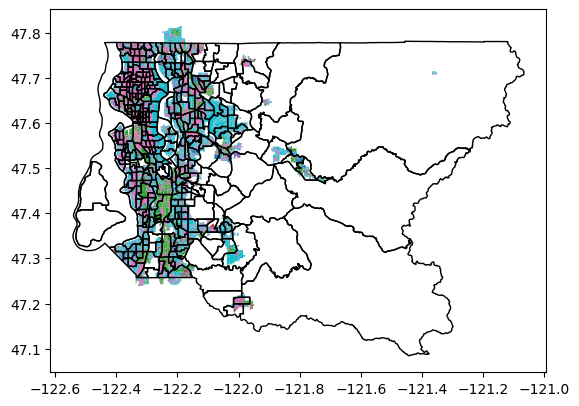

In [33]:
f, ax_overlay = plt.subplots()
king_gdf.plot(ax=ax_overlay,column='MASTER_CAT')
tract_geom_gdf.plot(ax=ax_overlay, facecolor='none', edgecolor='k')

C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(47.4, 47.5)

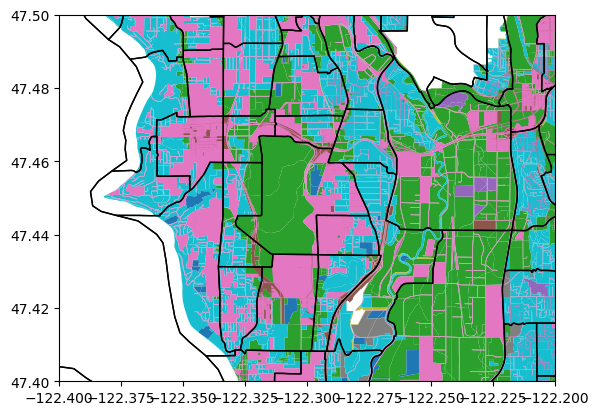

In [34]:
# Zoom
f, ax_overlay = plt.subplots()
king_gdf.plot(ax=ax_overlay,column='MASTER_CAT')
tract_geom_gdf.plot(ax=ax_overlay, facecolor='none', edgecolor='k')
ax_overlay.set_xlim(-122.4,-122.2)
ax_overlay.set_ylim(47.4,47.5)

# 4. Clip

To identify land use type of each census tract, we will calculate each land use type area in each census. Firstly, we need to clip land use by census, however, clip polygon over polygon does not work. Instead, we find the centroid of each land use polygon, then, area of each polygon are calculated. After that, census boundary is used to clip any point within census. Point with the largest area will be representative of the land use type of that census.

In [35]:
#gpd.clip(king_gdf,tract_geom_gdf) is not working

### Delete 'ROW' and 'PROW' as they are too small

To simplify analysis, ROW and PROW are removed from the data as they are too small

In [36]:
discard = ['ROW','PROW','Water']

In [37]:
king_gdf = king_gdf[~king_gdf['MASTER_CAT'].isin(discard)]

C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(47.4, 47.5)

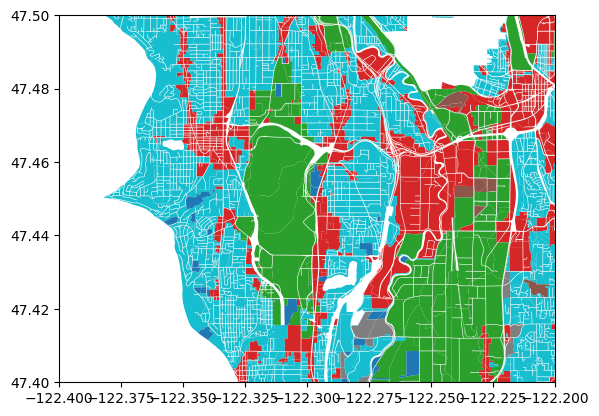

In [38]:
f, ax_clip = plt.subplots()
king_gdf.plot(ax=ax_clip,column='MASTER_CAT')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

### Find centroid of each land use area

In [39]:
king_gdf['centroid'] = king_gdf.centroid

C:\Users\Nutvara\AppData\Local\Temp\ipykernel_34552\546739704.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  king_gdf['centroid'] = king_gdf.centroid


In [40]:
king_gdf = king_gdf[~king_gdf['geometry'].isna()]

(47.4, 47.5)

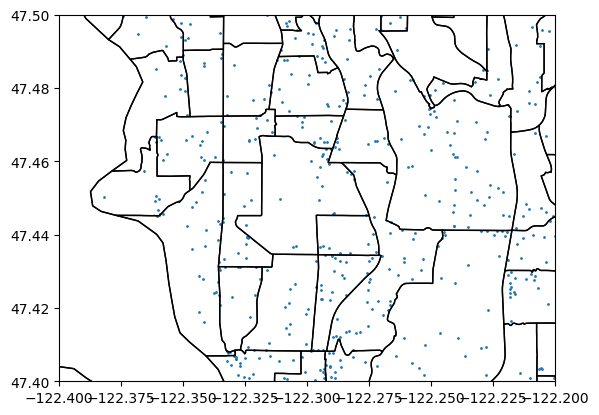

In [41]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=1)
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

### Calculate area for each land-use polygon

In [42]:
king_gdf['area'] = king_gdf['geometry'].area

C:\Users\Nutvara\AppData\Local\Temp\ipykernel_34552\2931238466.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  king_gdf['area'] = king_gdf['geometry'].area
C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(47.4, 47.5)

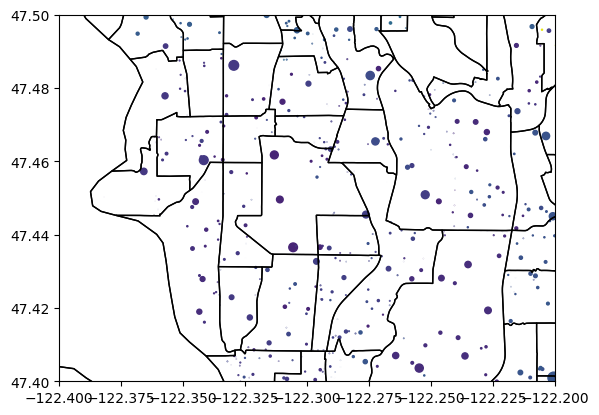

In [43]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=king_gdf['area']*10E4,c=king_gdf['MASTER_CAT'], cmap='viridis')
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

<Axes: >

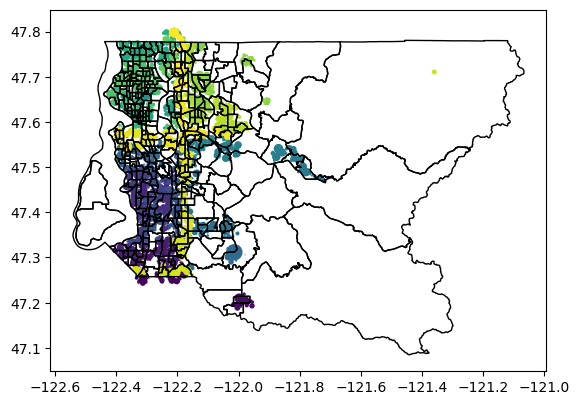

In [44]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=king_gdf['area']*10E4,c=king_gdf['MASTER_CAT'], cmap='viridis')
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')

### Clip point with Census polygon, find maximum area as the representative

Test with one census #025701

In [45]:
c025701 = king_gdf[king_gdf['centroid'].within(tract_geom_gdf.at['025701','geometry'])]
c025701

OBJECTID                             MASTER_CAT  \
660      14278                        Intensive Urban   
661      14279                        Intensive Urban   
1621     15358            Urban Character Residential   
1627     15369  Natural Preservation and Conservation   
5682     45028            Urban Character Residential   

                                                SUB_CAT    URB CITY_NM  \
660                                           Mixed Use  Urban  Renton   
661                                           Mixed Use  Urban  Renton   
1621  Traditional Single Family Residential (3.1-12 ...  Urban  Renton   
1627              Natural Preservation and Conservation  Urban  Renton   
5682  Traditional Single Family Residential (3.1-12 ...  Urban  Renton   

     AUPolyID  NAME  LUCodeID JoinID    FID  ... HU_2017_Density       Acres  \
660      8047  King     14279   None  14277  ...        4.505415   51.937499   
661      8127  King     14280   None  14278  ...        0.000000    0.039096   
1621     9037  King     15359   None  15357  ...        3.771118  581.525125   
1627     8127  King     15370   None  15368  ...        0.000000    0.502304   
5682     8047  King     45029   None  45027  ...        4.471508  876.661658   

     NEW_HU_17_Density NEW_00_17_Density   Shape__Area  Shape__Length  \
660           0.000000          0.481348  2.262388e+06   13291.018438   
661           0.000000          0.000000  1.703036e+03     304.962821   
1621          0.013757         -0.668931  2.533114e+07  239215.505327   
1627          0.000000          0.000000  2.188026e+04     643.849219   
5682          0.012548          0.881754  3.818723e+07  374615.372865   

                                  GlobalID  \
660   244ebe32-66bb-44ce-8d3b-39e80fc3e16a   
661   9b620e12-07fa-4e88-8a3c-1b02b0d6e5ce   
1621  dd11b22c-e386-450c-b595-17ba563c40f8   
1627  185ebea7-33ec-47b6-84c0-9c38899c600a   
5682  aa818938-86ba-486e-984a-461d08c04a58   

                                               geometry  \
660   MULTIPOLYGON (((-122.18405 47.47661, -122.1841...   
661   MULTIPOLYGON (((-122.19950 47.48056, -122.1995...   
1621  MULTIPOLYGON (((-122.22664 47.48798, -122.2266...   
1627  POLYGON ((-122.19954 47.48043, -122.19969 47.4...   
5682  MULTIPOLYGON (((-122.16005 47.50018, -122.1600...   

                         centroid          area  
660   POINT (-122.19277 47.47976)  2.507993e-05  
661   POINT (-122.19949 47.48056)  1.887946e-08  
1621  POINT (-122.20374 47.46692)  2.807523e-04  
1627  POINT (-122.19992 47.48016)  2.425577e-07  
5682  POINT (-122.17345 47.47157)  4.232658e-04  

[5 rows x 77 columns]

In [46]:
max_area_row = c025701[c025701['area'] == c025701['area'].max()]
max_area_row['MASTER_CAT']
# So the Census 025701 land use type is 'Urban Character Residential'

5682    Urban Character Residential
Name: MASTER_CAT, dtype: object

### Loop for each census

In [47]:
tract_list = tract_geom_gdf.index.to_list()

In [48]:
land_use_type = []
for t in tract_list:
    temp = king_gdf[king_gdf['centroid'].within(tract_geom_gdf.at[t,'geometry'])]
    temp_max = temp[temp['area'] == temp['area'].max()]
    try:
        land_type = temp_max['MASTER_CAT'].values[0]
    except IndexError:
        land_type = 'N/A'
    land_use_type.append(land_type)

In [49]:
tract_geom_gdf['land_use'] = land_use_type

In [50]:
tract_geom_gdf

geometry  \
Tract                                                       
025701  POLYGON ((-122.20643 47.46968, -122.20642 47.4...   
025702  POLYGON ((-122.18587 47.46643, -122.18581 47.4...   
025804  POLYGON ((-122.18595 47.45700, -122.18593 47.4...   
026001  POLYGON ((-122.24963 47.49934, -122.24951 47.4...   
026100  POLYGON ((-122.27058 47.49558, -122.27030 47.4...   
...                                                   ...   
002400  POLYGON ((-122.29602 47.69023, -122.29504 47.6...   
002600  POLYGON ((-122.31759 47.68855, -122.31627 47.6...   
002900  POLYGON ((-122.36604 47.68178, -122.36598 47.6...   
009400  POLYGON ((-122.31732 47.59435, -122.31695 47.5...   
009500  POLYGON ((-122.30297 47.58692, -122.30269 47.5...   

                                     land_use  
Tract                                          
025701            Urban Character Residential  
025702  Natural Preservation and Conservation  
025804            Urban Character Residential  
026001                           Undesignated  
026100                        Intensive Urban  
...                                       ...  
002400                        Intensive Urban  
002600                        Intensive Urban  
002900                                    N/A  
009400                        Intensive Urban  
009500                        Intensive Urban  

[398 rows x 2 columns]

<Axes: >

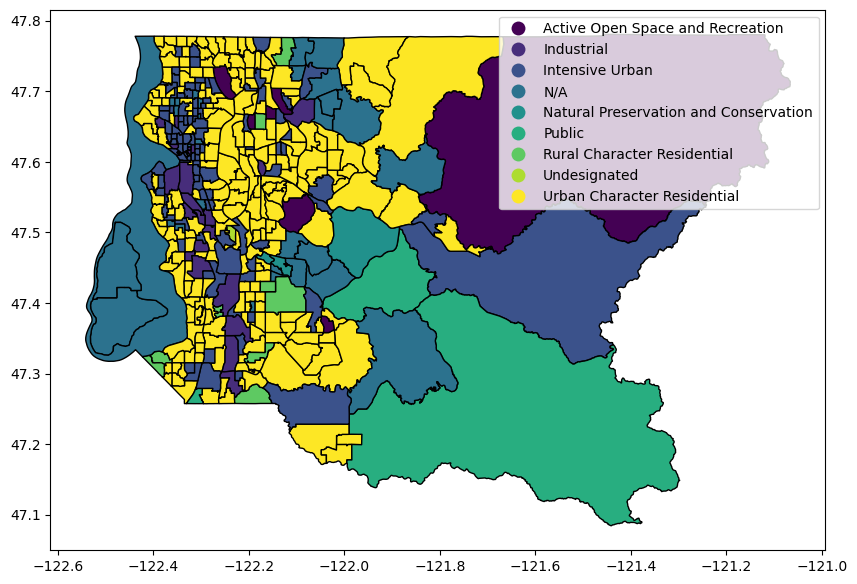

In [51]:
f, ax_land_use = plt.subplots(figsize=(10,10))
tract_geom_gdf.plot(ax=ax_land_use, column='land_use', edgecolor='k', legend=True,cmap='viridis')

# 5. Export file

In [46]:
tract_geom_gdf.to_file('tract_landuse_gdf', driver='GeoJSON')

In [3]:
filename = "./tract_landuse_gdf"
file = open(filename)
tract_landuse_gdf = gpd.read_file(file)

In [4]:
tract_landuse_gdf

Tract                               land_use  \
0    025701            Urban Character Residential   
1    025702  Natural Preservation and Conservation   
2    025804            Urban Character Residential   
3    026001                           Undesignated   
4    026100                        Intensive Urban   
..      ...                                    ...   
393  002400                        Intensive Urban   
394  002600                        Intensive Urban   
395  002900                                    N/A   
396  009400                        Intensive Urban   
397  009500                        Intensive Urban   

                                              geometry  
0    POLYGON ((-122.20643 47.46968, -122.20642 47.4...  
1    POLYGON ((-122.18587 47.46643, -122.18581 47.4...  
2    POLYGON ((-122.18595 47.45700, -122.18593 47.4...  
3    POLYGON ((-122.24963 47.49934, -122.24951 47.4...  
4    POLYGON ((-122.27058 47.49558, -122.27030 47.4...  
..                                                 ...  
393  POLYGON ((-122.29602 47.69023, -122.29504 47.6...  
394  POLYGON ((-122.31759 47.68855, -122.31627 47.6...  
395  POLYGON ((-122.36604 47.68178, -122.36598 47.6...  
396  POLYGON ((-122.31732 47.59435, -122.31695 47.5...  
397  POLYGON ((-122.30297 47.58692, -122.30269 47.5...  

[398 rows x 3 columns]

# 6. Work with Rasterio 

This section intends to visulaize different type of land use. Raster image from Lab 05 will be used.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import rasterio.plot
from matplotlib_scalebar.scalebar import ScaleBar

In [6]:
p_fn = './Data/west_wa_summer.tiff'

In [68]:
p_src = rio.open(p_fn)

In [182]:
import rasterio.windows
window = rasterio.windows.Window(2100, 2800, 1024, 1024)
window_sea = rasterio.windows.Window(5000, 6000, 1024, 1024)

In [184]:
#Define window bounds for Pan_Seattle 
window_bounds_sea = rasterio.windows.bounds(window_sea, p_src.transform)
print("Window bounds Sea: ", window_bounds_sea)
#Define window extent
window_extent_sea = [window_bounds_sea[0], window_bounds_sea[2], window_bounds_sea[1], window_bounds_sea[3]]
print("Window extent Sea: ", window_extent_sea)

Window bounds Sea:  (548392.5, 5267947.5, 563752.5, 5283307.5)
Window extent Sea:  [548392.5, 563752.5, 5267947.5, 5283307.5]


In [185]:
# Define a function to read only this subwindow into an array
def rio2ma(fn, b=1, window=None, scale=True):
    with rio.open(fn) as src:
        #If working with PAN, scale offset and dimensions by factor of 2
        if 'B8' in fn and window is not None:
            window = rasterio.windows.Window(window.col_off*2, window.row_off*2, window.width*2, window.height*2)
        #Read in the window to masked array
        a = src.read(b, window=window, masked=True)
        #If Level 2 surface reflectance and surface temperature, scale values appropriately
        if scale:
            if 'SR' in fn:
                #Output in unitless surface reflectance from 0-1
                a = a * sr_scale + sr_offset
            elif 'ST' in fn:
                #Output in degrees Celsius
                a = a * st_scale + st_offset - 273.15
            a = a.astype('float32')
        return a

In [186]:
# A function to normalize (AKA contrast stretch) input Panchromatic image array values
def norm(a, percentile=(2, 98), clip=True):
    amin, amax = np.percentile(a.compressed(), 2), np.percentile(a.compressed(), 98)
    normalized_a = (a - amin) / (amax - amin)
    if clip:
        normalized_a = np.clip(normalized_a, 0, 1)
    return normalized_a

In [187]:
sea_array = rio2ma(p_fn, b=1, window=window_sea, scale=True)

Text(0.5, 1.0, 'Original DN')

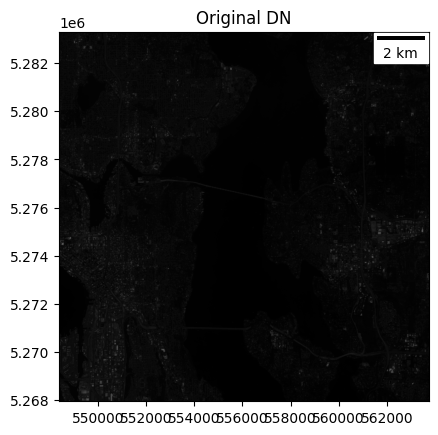

In [188]:
fig, (ax_sea) = plt.subplots()
ax_sea.imshow(sea_array,cmap="Greys_r",extent=window_extent_sea)
ax_sea.add_artist(ScaleBar(1.0))
ax_sea.set_title("Original DN")

In [189]:
sea_array_s = norm(sea_array)

Text(0.5, 1.0, 'Normalized Values, Linear Stretch')

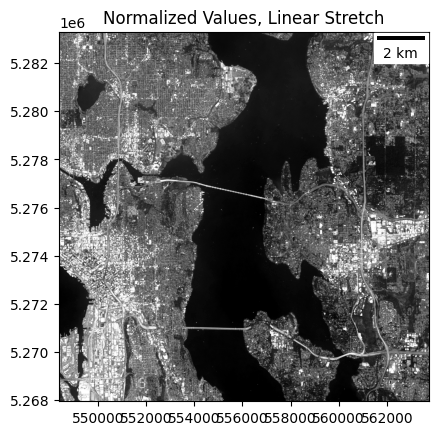

In [190]:
fig, (ax_sea_s) = plt.subplots()
ax_sea_s.imshow(sea_array_s,cmap="Greys_r",extent=window_extent_sea)
ax_sea_s.add_artist(ScaleBar(1.0))
ax_sea_s.set_title("Normalized Values, Linear Stretch")

In [191]:
#Red
r_fn = './Data/B4.tiff'
#Green
g_fn = './Data/B3.tiff'
#Blue
b_fn = './Data/B2.tiff'

In [192]:
r_src = rio.open(r_fn)
g_src = rio.open(g_fn)
b_src = rio.open(b_fn)

In [196]:
#Define window bounds for Pan_Seattle 
window_bounds_sea2 = rasterio.windows.bounds(window, r_src.transform)
print("Window bounds Sea: ", window_bounds_sea2)
#Define window extent
window_extent_sea2 = [window_bounds_sea2[0], window_bounds_sea2[2], window_bounds_sea2[1], window_bounds_sea2[3]]
print("Window extent Sea: ", window_extent_sea2)

Window bounds Sea:  (536685.0, 5258895.0, 567405.0, 5289615.0)
Window extent Sea:  [536685.0, 567405.0, 5258895.0, 5289615.0]


In [197]:
sea_array_r = rio2ma(r_fn, b=1, window=window, scale=True)
sea_array_g = rio2ma(g_fn, b=1, window=window, scale=True)
sea_array_b = rio2ma(b_fn, b=1, window=window, scale=True)
r_norm_sea = norm(sea_array_r)
g_norm_sea = norm(sea_array_g)
b_norm_sea = norm(sea_array_b)
rgb_sea = np.dstack([r_norm_sea,g_norm_sea,b_norm_sea])

In [198]:
tract_geom_gdf2 = tract_geom_gdf.to_crs(32610)

(538392.5, 563752.5)

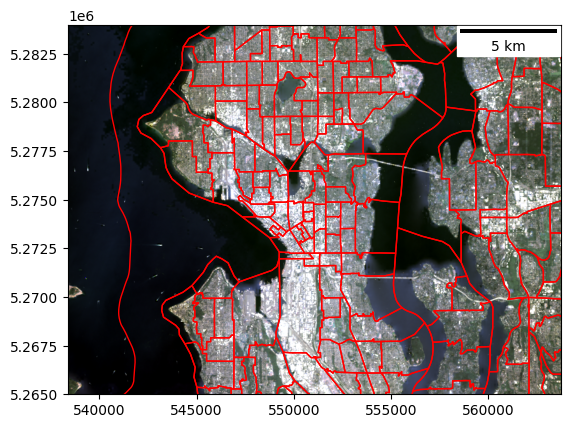

In [199]:
f, ax_sea_rgb = plt.subplots()
ax_sea_rgb.imshow(rgb_sea,extent=window_extent_sea2)
ax_sea_rgb.add_artist(ScaleBar(1.0))
tract_geom_gdf2.plot(ax=ax_sea_rgb, facecolor='none', edgecolor='r')

ax_sea_rgb.set_ylim(5.265E6, 5.284E6)
ax_sea_rgb.set_xlim(538392.5, 563752.5)

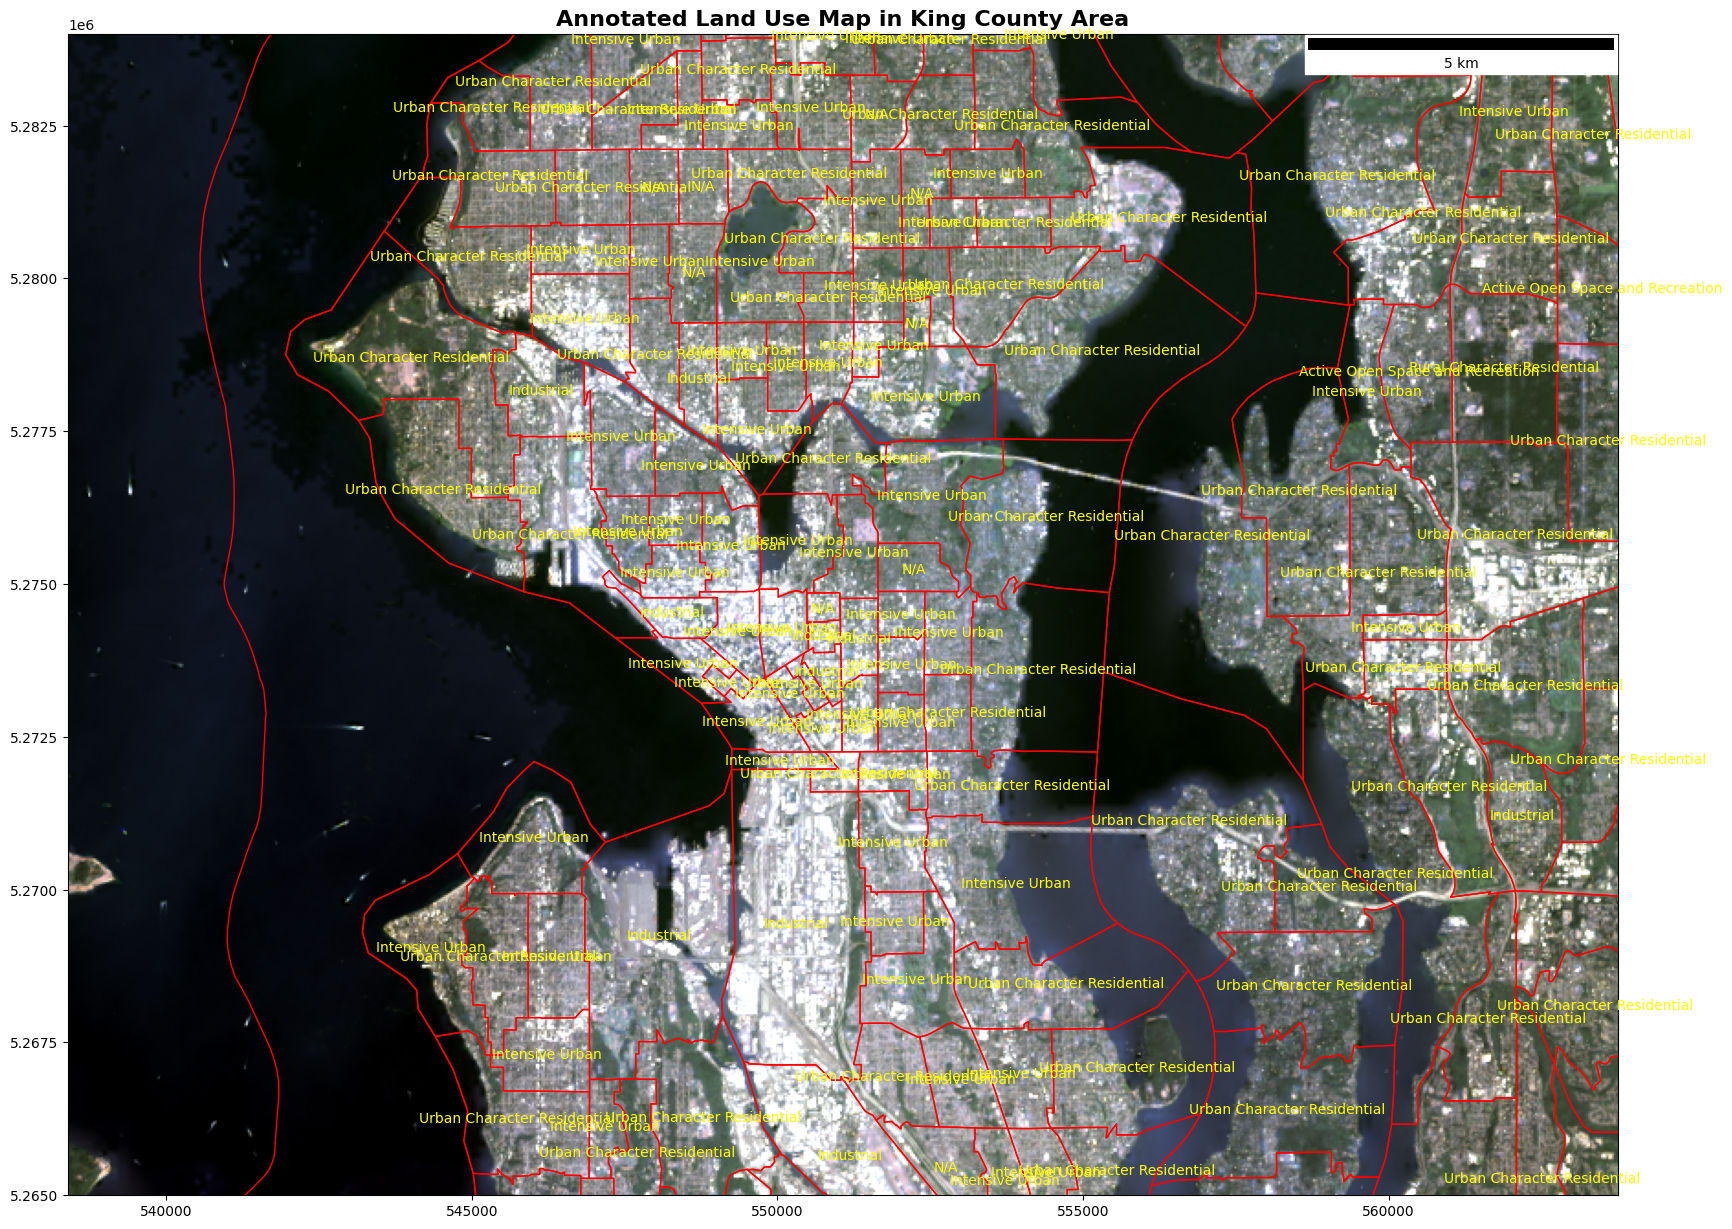

In [233]:
f, ax_sea_rgb = plt.subplots(figsize=(20,20))

ax_sea_rgb.imshow(rgb_sea,extent=window_extent_sea2)


ax_sea_rgb.add_artist(ScaleBar(1.0))
tract_geom_gdf2.plot(ax=ax_sea_rgb, facecolor='none', edgecolor='r')
ax_sea_rgb.set_ylim(5.265E6, 5.284E6)
ax_sea_rgb.set_xlim(538392.5, 563752.5)
ax_sea_rgb.set_title("Annotated Land Use Map in King County Area", fontsize=16, fontweight='bold')

for idx, row in tract_geom_gdf2.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    value = row['land_use']
    ax_sea_rgb.annotate(str(value), (x, y), color='yellow', fontsize=10, ha='center', va='center')

## Zoom for verification

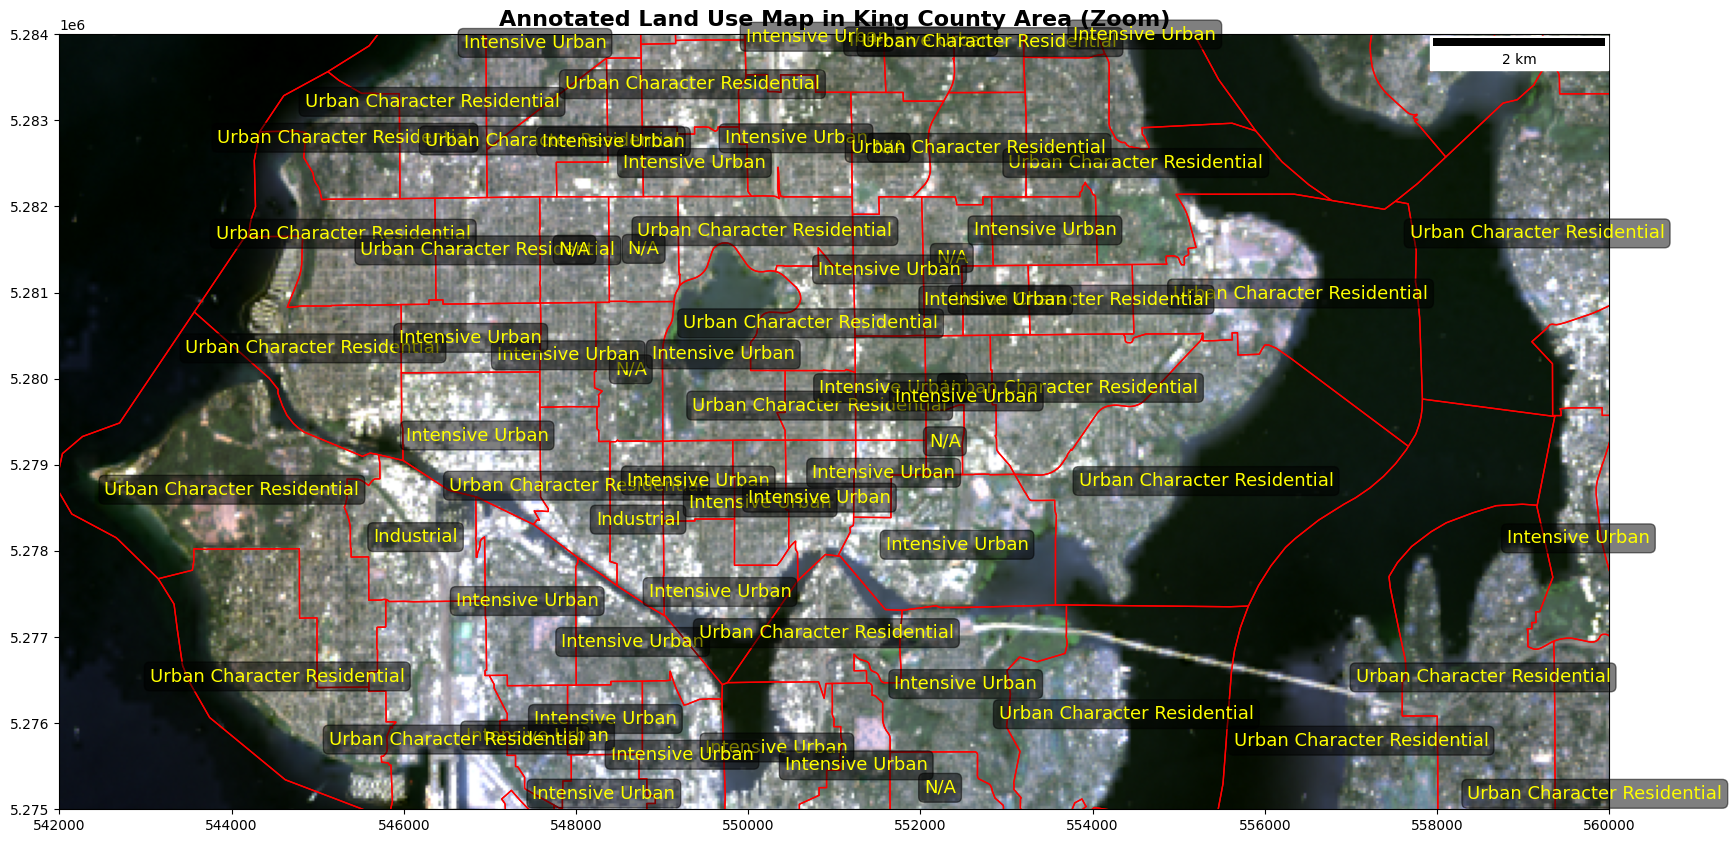

In [234]:
f, ax_sea_rgb = plt.subplots(figsize=(20,20))
ax_sea_rgb.imshow(rgb_sea,extent=window_extent_sea2)
ax_sea_rgb.add_artist(ScaleBar(1.0))
tract_geom_gdf2.plot(ax=ax_sea_rgb, facecolor='none', edgecolor='r')
ax_sea_rgb.set_ylim(5.275E6, 5.284E6)
#ax_sea_rgb.set_xlim(548392.5, 563752.5)
ax_sea_rgb.set_xlim(542000, 560000)
ax_sea_rgb.set_title("Annotated Land Use Map in King County Area (Zoom)", fontsize=16, fontweight='bold')

for idx, row in tract_geom_gdf2.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    value = row['land_use']
    ax_sea_rgb.annotate(str(value), (x, y), color='yellow', fontsize=13, ha='center', va='center',bbox=dict(boxstyle='round', facecolor='black', edgecolor='black', alpha=0.5))

<span style="color:blue"> Census tract polygon and rasterio are aligned accurately. This validates our analysis
* UW area defines as intensive urban
* Green lake area defines as Urban Character Residential
* King County International Airport - Boeing Field defines as industrial </span>.